In [8]:
import os
import pandas as pd
import json
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import torch

# 結果の可視化

In [13]:
workdir = Path(os.path.dirname(os.path.abspath("")))
reportsdir = workdir / 'output/reports'

In [22]:
sorted(reportsdir.iterdir())

[PosixPath('/code/output/reports/201910232337result.json'),
 PosixPath('/code/output/reports/201910240325result.json'),
 PosixPath('/code/output/reports/201910240730result.json'),
 PosixPath('/code/output/reports/201910242304result.json'),
 PosixPath('/code/output/reports/201910250021result.json'),
 PosixPath('/code/output/reports/201910250100result.json'),
 PosixPath('/code/output/reports/201910250318result.json'),
 PosixPath('/code/output/reports/_20191030-2252_NELseq20_baselstmresult.json'),
 PosixPath('/code/output/reports/_20191031-0020_NERseq20_baselstmresult.json'),
 PosixPath('/code/output/reports/baselstmresult.json')]

In [29]:
with open(str(reportsdir / '201910250100result.json'), 'r') as f:
    rep = json.load(f)

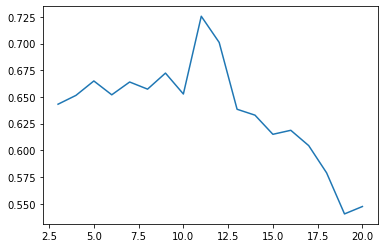

In [30]:
sns.lineplot(
    x=[i for i in range(3,21)],
    y=[r['best_eval_auc'] for r in rep]
)

In [24]:
with open(str(reportsdir / '_20191030-2252_NELseq20_baselstmresult.json'), 'r') as f:
    repNEL = json.load(f)
with open(str(reportsdir / '_20191031-0020_NERseq20_baselstmresult.json'), 'r') as f:
    repNER = json.load(f)

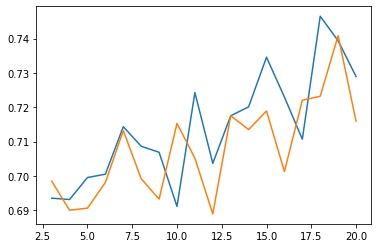

In [27]:
sns.lineplot(
    x=[i for i in range(3,21)],
    y=[r['best_eval_auc'] for r in repNEL]
)
sns.lineplot(
    x=[i for i in range(3,21)],
    y=[r['best_eval_auc'] for r in repNER]
)

# Asteriaのデータ分布を見る

In [31]:
with open(workdir / 'data/input/Asteria_Eng_ver5.pickle', 'rb') as f:
    data = pickle.load(f)

In [35]:
seqlen = []
for uid, seq in data.items():
    last_learned_sid = -1
    sid_len = 0
    for x in seq:
        sid = x[0]
        if sid == last_learned_sid:
            sid_len += 1
        elif sid != last_learned_sid and last_learned_sid == -1:
            last_learned_sid = sid
            continue
        else:
            seqlen.append(sid_len)
            sid_len = 0
            last_learned_sid = sid

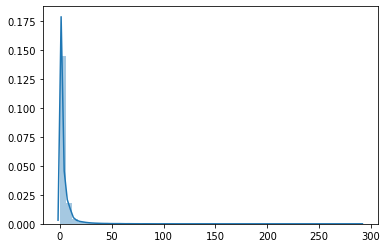

In [37]:
sns.distplot(seqlen)

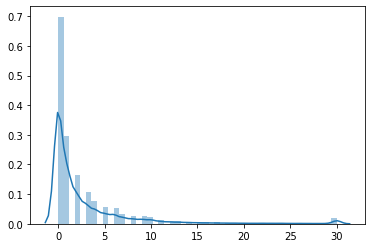

In [40]:
seqlen_zoom = []
for s in seqlen:
    limit = 30
    if s > limit:
        seqlen_zoom.append(limit)
    else:
        seqlen_zoom.append(s)
sns.distplot(seqlen_zoom)

# 特定のSequence長で切ったとき，Sequence長ごとに含まれるスキル数の分布を調べる

In [19]:
import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import prepare_data, load_source, slice_d

In [12]:
source_data = 'Asteria_Eng_ver5_sorted7'
n_skills = 326
sequence_size = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dl, eval_dl = prepare_data(
    source_data, 'base', n_skills, preserved_tokens='?',
    min_n=3, max_n=sequence_size, batch_size=1, device=device, sliding_window=0)

In [17]:
[t.shape for t in train_dl.dataset.tensors]

[torch.Size([5078, 20, 654]),
 torch.Size([5078, 326]),
 torch.Size([5078]),
 torch.Size([5078, 20, 326]),
 torch.Size([5078, 20])]

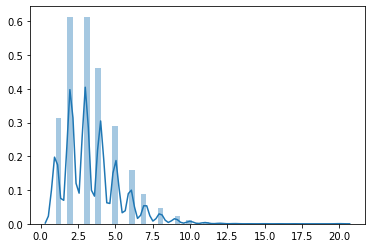

In [32]:
data = load_source('Asteria_Eng_ver5')
sequence_size = 20

seqlen_distribution = []
for seq in data:
    for ix in range(0, len(seq), sequence_size):
        seqlen_distribution.append(len({x[0] for x in seq[ix: ix+sequence_size]}))
        
sns.distplot(seqlen_distribution, )

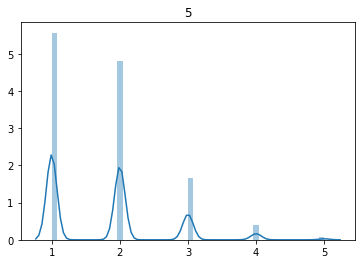

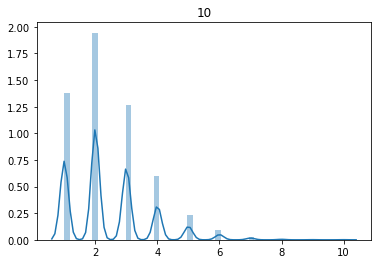

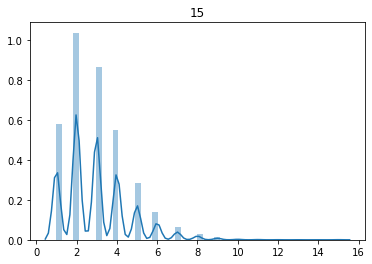

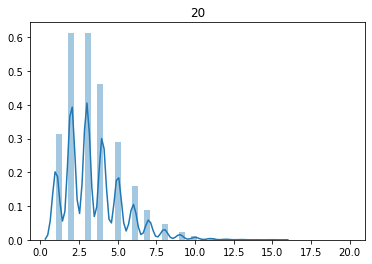

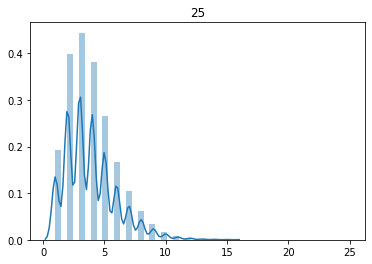

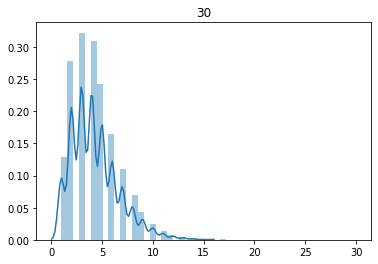

In [40]:
data = load_source('Asteria_Eng_ver5')
for sequence_size in range(5, 31, 5):

    seqlen_distribution = []
    for seq in data:
        for ix in range(0, len(seq), sequence_size):
            seqlen_distribution.append(len({x[0] for x in seq[ix: ix+sequence_size]}))

    sns.distplot(seqlen_distribution, label=str(sequence_size), kde_kws={'clip': (0., 16.)})
    plt.title(str(sequence_size))
    plt.show()
